In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
glass=pd.read_excel('glass_df.xlsx')

In [3]:
glass

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.00,0.00,1
1,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
2,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
3,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.00,0.00,1
4,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.20,0.00,2.79,73.46,0.04,9.04,0.40,0.09,7
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
211,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.00,5
212,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5


In [4]:
glass['glass_type'].value_counts()

glass_type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [5]:
glass['glass_type']=glass['glass_type'].map({1:0,2:0,3:0,5:1,6:1,7:1})
glass['glass_type']

0      0
1      1
2      0
3      0
4      0
      ..
209    1
210    1
211    1
212    1
213    1
Name: glass_type, Length: 214, dtype: int64

In [6]:
glass['glass_type'].value_counts()

glass_type
0    163
1     51
Name: count, dtype: int64

In [7]:
glass.columns

Index(['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'glass_type'], dtype='object')

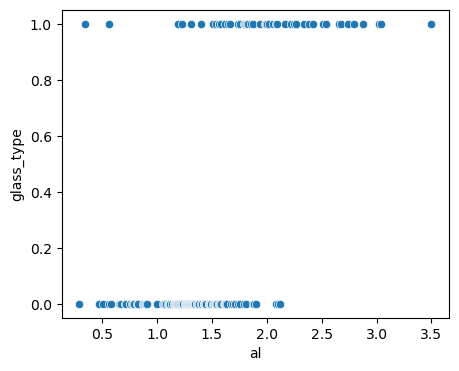

In [8]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=glass['al'],y=glass['glass_type'])
plt.show()

In [9]:
# let check linear regression model

In [10]:
x=glass[['al']]
y=glass['glass_type']

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
glass['linear_model_prediction']=model.predict(x)

In [11]:
glass[['glass_type','linear_model_prediction']]

,glass_type,linear_model_prediction
0,0,-0.340495
1,1,-0.315436
2,0,-0.250283
3,0,-0.250283
4,0,-0.230236
...,...,...
209,1,0.912448
210,1,0.957554
211,1,1.027718
212,1,1.037742


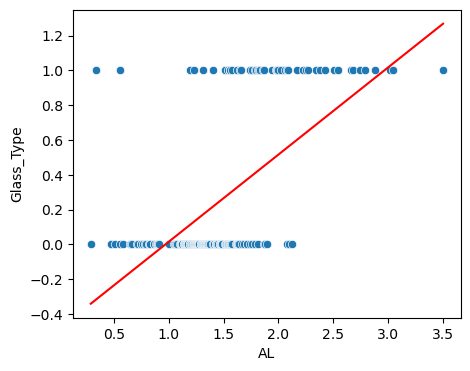

In [12]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=glass['al'],y=glass['glass_type'])
plt.plot(glass['al'],glass['linear_model_prediction'],color='red')
plt.xlabel("AL")
plt.ylabel("Glass_Type")
plt.show()




In [13]:
#logistic regression model


In [14]:
from sklearn.model_selection import train_test_split
x=glass[['al']]
y=glass['glass_type']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=5)

In [15]:
print(x_train.shape)
print(x_test.shape)

(171, 1)
(43, 1)


In [16]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x,y)


LogisticRegression()

In [17]:
log_model.predict(x_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
log_model.predict_proba(x_test)


array([[0.9643993 , 0.0356007 ],
       [0.90906592, 0.09093408],
       [0.87982403, 0.12017597],
       [0.85861744, 0.14138256],
       [0.96104764, 0.03895236],
       [0.1970586 , 0.8029414 ],
       [0.07403866, 0.92596134],
       [0.94755733, 0.05244267],
       [0.98614074, 0.01385926],
       [0.71740056, 0.28259944],
       [0.4526769 , 0.5473231 ],
       [0.96104764, 0.03895236],
       [0.88935998, 0.11064002],
       [0.77064733, 0.22935267],
       [0.92114754, 0.07885246],
       [0.92767402, 0.07232598],
       [0.81642865, 0.18357135],
       [0.28774693, 0.71225307],
       [0.82558284, 0.17441716],
       [0.80200622, 0.19799378],
       [0.90906592, 0.09093408],
       [0.85861744, 0.14138256],
       [0.8695867 , 0.1304133 ],
       [0.82558284, 0.17441716],
       [0.91650173, 0.08349827],
       [0.76509488, 0.23490512],
       [0.59166957, 0.40833043],
       [0.03044844, 0.96955156],
       [0.87649106, 0.12350894],
       [0.98949363, 0.01050637],
       [0.

In [19]:
log_model.predict_proba(x)[:,1]

array([0.0060241 , 0.00703229, 0.01050637, 0.01050637, 0.01188403,
       0.01385926, 0.01385926, 0.01473708, 0.0182624 , 0.01882938,
       0.01941362, 0.02193337, 0.02261169, 0.0247719 , 0.0247719 ,
       0.02632245, 0.02713275, 0.02796727, 0.03062309, 0.03156149,
       0.03156149, 0.0356007 , 0.0356007 , 0.03668586, 0.03780279,
       0.03895236, 0.03895236, 0.04013542, 0.05244267, 0.05244267,
       0.06074468, 0.06254655, 0.0643982 , 0.0663008 , 0.07026349,
       0.07232598, 0.07232598, 0.07232598, 0.07444415, 0.07444415,
       0.07444415, 0.07885246, 0.07885246, 0.08114506, 0.08114506,
       0.08349827, 0.08349827, 0.08591334, 0.08591334, 0.08839152,
       0.08839152, 0.08839152, 0.09093408, 0.09093408, 0.09093408,
       0.09093408, 0.09093408, 0.09093408, 0.09354227, 0.09621736,
       0.09621736, 0.09896059, 0.10177322, 0.10177322, 0.10177322,
       0.10177322, 0.10177322, 0.10465651, 0.10465651, 0.1076117 ,
       0.1076117 , 0.1076117 , 0.11064002, 0.11064002, 0.11064

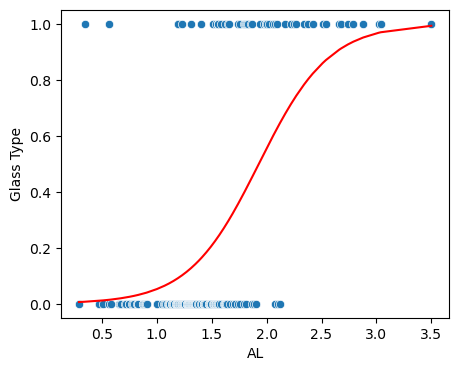

In [20]:
plt.figure(figsize=(5,4))

sns.scatterplot(x=glass['al'], y=glass['glass_type'])
plt.plot(glass['al'], log_model.predict_proba(x)[:,1], color = 'red')
plt.xlabel('AL')
plt.ylabel('Glass Type')
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report

In [22]:
y_pred=log_model.predict(x_test)


In [23]:
confusion_matrix(y_test,y_pred)

array([[34,  1],
       [ 2,  6]], dtype=int64)

In [24]:
accuracy_score(y_test,y_pred)

0.9302325581395349

In [25]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.97      0.96        35\n           1       0.86      0.75      0.80         8\n\n    accuracy                           0.93        43\n   macro avg       0.90      0.86      0.88        43\nweighted avg       0.93      0.93      0.93        43\n'

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.86      0.75      0.80         8

    accuracy                           0.93        43
   macro avg       0.90      0.86      0.88        43
weighted avg       0.93      0.93      0.93        43

